# Chapter 4: Dipping Toes in Deep Learning

## Convolution Neural Networks

Convolution neural networks (CNNs) have gained unparalleled popularity in computer vision tasks. A convolution neural network consists of several important components, such as,

* Convolution layers
* Pooling layers
* Dense layers (for final prediction)

In this chapter, we will use CNNs to learn the Cifar10 dataset. Like MNIST, Cifar10 is another popular dataset in computer vision. But it is a much more interesting dataset as you will see. Specifically, you will learn the following.

* How to do simple data exploration
* How to define a CNN model
* How to format data to suit model training
* How to train a model

<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/thushv89/manning_tf2_in_action/blob/master/Ch04/4.2.Convolution_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
    </td>
</table>

## Importing necessary libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")

# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.4.1


## Loading and Exploring the data

Here we will load the dataset using the `tensorflow-datasets` library. Next, we will print the very first item in the dataset and see what we have. You will see that image data varies between [0,255]. Finally, we will plot some of the images to understand the classes and images we have to work with. We will not explore this too much as we have already worked with this dataset briefly in Chapter 2.

In [2]:
# Section 4.2

import tensorflow_datasets as tfds
# Loading the CIFAR10 dataset
data = tfds.load('cifar10')

In [3]:
print(data)

{'test': <PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>, 'train': <PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>}


In [3]:
# Section 4.2

# Let's see the first element in the training set
for i in data["train"].take(1):
    print(i)

{'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212,

## Plotting the data

Let's plot some data along with the image categories for those images.

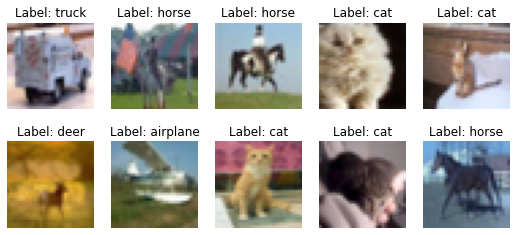

In [4]:
# Section 4.2

import matplotlib.pyplot as plt
%matplotlib inline

# Take 10 samples randomly to plot
sample_images, sample_labels = [],[]
for d in data["train"].shuffle(100, seed=4321).take(10):
    sample_images.append(d["image"].numpy())
    sample_labels.append(d["label"].numpy())

# Creating a label map mapping the integer label to the string
label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

## Defining the model

Let's define a CNN model. But wait, we are getting an error trying to run this model. This is because, one needs to be careful of the output sizes of the model's each layer. In this case, the model we created has led to an invalid height and width dimensions causing an error.

In [5]:
# Section 4.2
# Code listing 4.3

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(9,9), strides=(2,2), activation='relu', input_shape=(32,32,3)), # 32->12
     layers.Conv2D(32, (7,7), activation='relu'), # 12 -> 6
     layers.Conv2D(64, (7,7), activation='relu'), # 6 -> -1
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')]
)

ValueError: Negative dimension size caused by subtracting 7 from 6 for 'conv2d_2/Conv2D' (op: 'Conv2D') with input shapes: [?,6,6,32], [7,7,32,64].

## Defining the model the correct way

Good thing we got that error out of the way. Now let's fix the model above so we don't have any errors.

In [4]:
# Section 4.2
# Code listing 4.4

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model without any errores
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3)), # 32->16
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 16->8
     layers.Conv2D(32, (3,3), activation='relu', padding='same'), # 8 -> 8
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 8->4
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')]
)

# Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Training the model

Finally, you can train the model. But to do that we will need to slightly change the dataset object we have. We will convert the images to `float32` (which are originally `uint8`) and convert labels to one-hot encoded vectors. To do this we will use the `tf.data.DataSet.map()` function as we have done earlier.

Now let's train the model. We can see that training accuracy of the model is growing steadily. That's a great result! 

In [5]:
# Section 4.2

import tensorflow as tf

def format_data(x, depth):
    """ Create a tuple where 1st element is a batch of images 
    and the second is a batch of onehot encoded vectors"""
    return (tf.cast(x["image"], 'float32'), tf.one_hot(x["label"], depth=depth))

# Map the dataset using the function
tr_data = data["train"].map(lambda x: format_data(x, depth=10)).batch(32)

In [6]:
for d in tr_data.take(1):
    print(d)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[143.,  96.,  70.],
         [141.,  96.,  72.],
         [135.,  93.,  72.],
         ...,
         [ 96.,  37.,  19.],
         [105.,  42.,  18.],
         [104.,  38.,  20.]],

        [[128.,  98.,  92.],
         [146., 118., 112.],
         [170., 145., 138.],
         ...,
         [108.,  45.,  26.],
         [112.,  44.,  24.],
         [112.,  41.,  22.]],

        [[ 93.,  69.,  75.],
         [118.,  96., 101.],
         [179., 160., 162.],
         ...,
         [128.,  68.,  47.],
         [125.,  61.,  42.],
         [122.,  59.,  39.]],

        ...,

        [[187., 150., 123.],
         [184., 148., 123.],
         [179., 142., 121.],
         ...,
         [198., 163., 132.],
         [201., 166., 135.],
         [207., 174., 143.]],

        [[187., 150., 117.],
         [181., 143., 115.],
         [175., 136., 113.],
         ...,
         [201., 164., 132.],
         [205., 168., 135.],
         

In [7]:
# Section 4.2
# Fit the data
history = cnn.fit(tr_data,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.0566 - acc: 0.3195
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4664 - acc: 0.4699
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3075 - acc: 0.5306
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2163 - acc: 0.5673
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1498 - acc: 0.5933
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1042 - acc: 0.6104
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0637 - acc: 0.6245
Epoch 8/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0346 - acc: 0.6350
Epoch 9/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0086 - acc: 0.6465
Epoch 10/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9795 - acc: 0.6559
Epoch 11/25
1563/1